# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn import linear_model as lm
import scikitplot as skplt


# helper functions

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def precision_at_k( data, k=2000 ):
    # reset index
    data = data.reset_index( drop=True )

    # create ranking order
    data['ranking'] = data.index + 1 

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k, 'precision_at_k']

In [ ]:
def recall_at_k( data, k=2000 ):
    # reset index
    data = data.reset_index( drop=True )

    # create ranking order
    data['ranking'] = data.index + 1 

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    return data.loc[k, 'recall_at_k']

In [ ]:
def performace(model_name,data,y_val,yhat_class,k):
    import sklearn.metrics
    prec = sklearn.metrics.precision_score(y_val,yhat_class)
    recal = sklearn.metrics.recall_score(y_val,yhat_class)
    recal_k = recall_at_k(data,k)
    prec_k = precision_at_k(data,k)
    
    return pd.DataFrame({'Model Name':model_name,
                        'Precison':prec,
                        'Recall':recal,
                        'k':k,
                        'Precison at k':prec_k,
                        'Recall at k':recal_k},index=[0])

# Load data

In [ ]:
df6 = pd.read_csv('data/df5.csv')

In [ ]:
df6.head()

,id,age,region_code,policy_sales_channel,previously_insured,vintage,vehicle_age,vehicle_damage,response
0,1,0.369231,28.0,26.0,0,0.716263,3,1,1
1,2,0.861538,3.0,26.0,0,0.598616,2,0,0
2,3,0.415385,28.0,26.0,0,0.058824,3,1,1
3,4,0.015385,11.0,152.0,1,0.667820,1,0,0
4,5,0.138462,41.0,152.0,1,0.100346,1,0,0


In [ ]:
df6.dtypes

id                        int64
age                     float64
region_code             float64
policy_sales_channel    float64
previously_insured        int64
vintage                 float64
vehicle_age               int64
vehicle_damage            int64
response                  int64
dtype: object

## Slipt train test

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
train, val = train_test_split(df6,test_size=0.3,stratify=df6['response'],random_state=42)

# train dataframes
X_train = train.copy()
y_train = X_train['response']
X_train.drop(columns = ['response','id'],inplace=True)
# validation dataframes
x_val = val.copy()
y_val = val['response']
x_val.drop(columns = ['response','id'],inplace=True)

# Machine learning

## KNN

In [ ]:
#model
knn_model = KNeighborsClassifier(n_neighbors=5)

# model training
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#model prediction proba - poder de generalizção
yhat_knn_proba = knn_model.predict_proba( x_val )

#model prediction - poder de generalizção
yhat_knn_class = knn_model.predict( x_val )

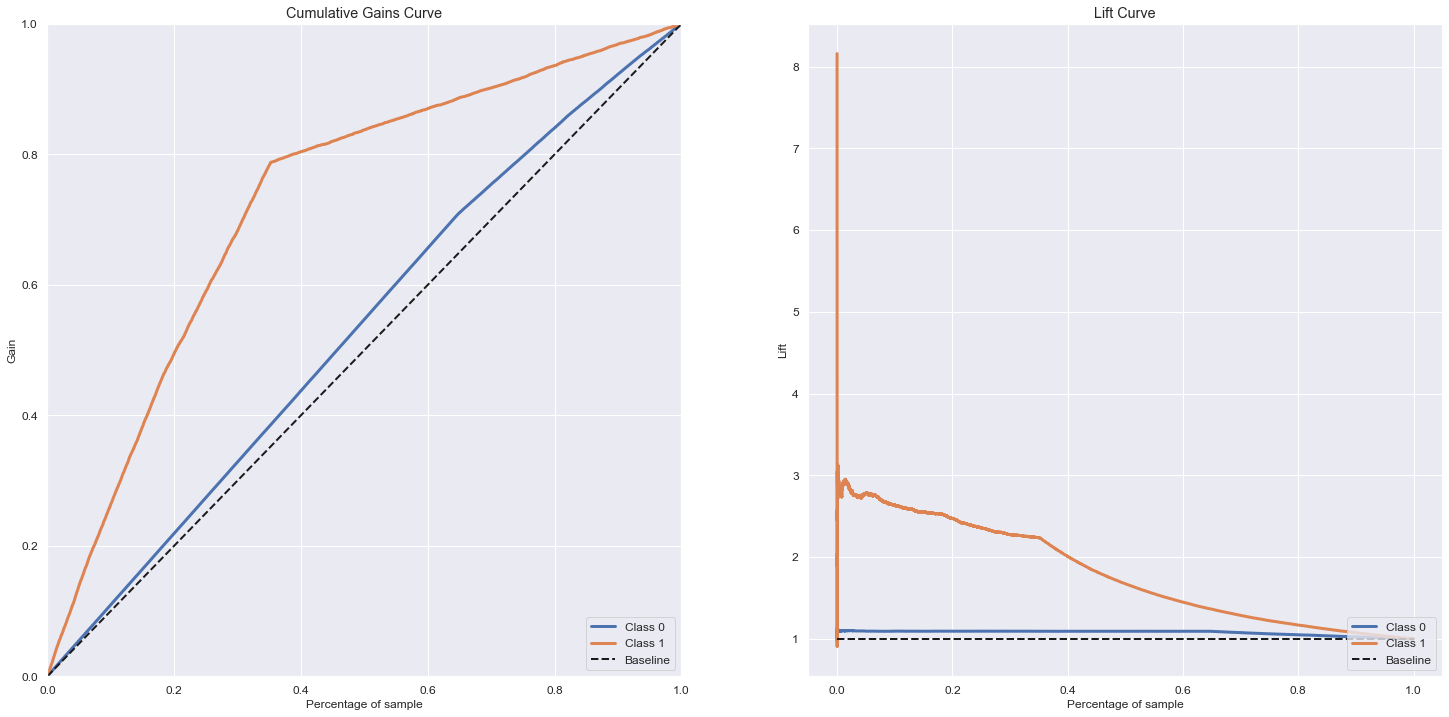

In [ ]:
fig ,ax = plt.subplots(1,2)
skplt.metrics.plot_cumulative_gain(y_val,yhat_knn_proba,ax=ax[0]);
skplt.metrics.plot_lift_curve(y_val,yhat_knn_proba,ax=ax[1]);

## Linear model

In [ ]:
lm_model = lm.LogisticRegression(random_state=42,n_jobs=-1)
lm_model.fit(X_train,y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [ ]:
#model prediction proba - poder de generalizção
yhat_lm_proba = lm_model.predict_proba( x_val )

#model prediction - poder de generalizção
yhat_lm_class = lm_model.predict( x_val )

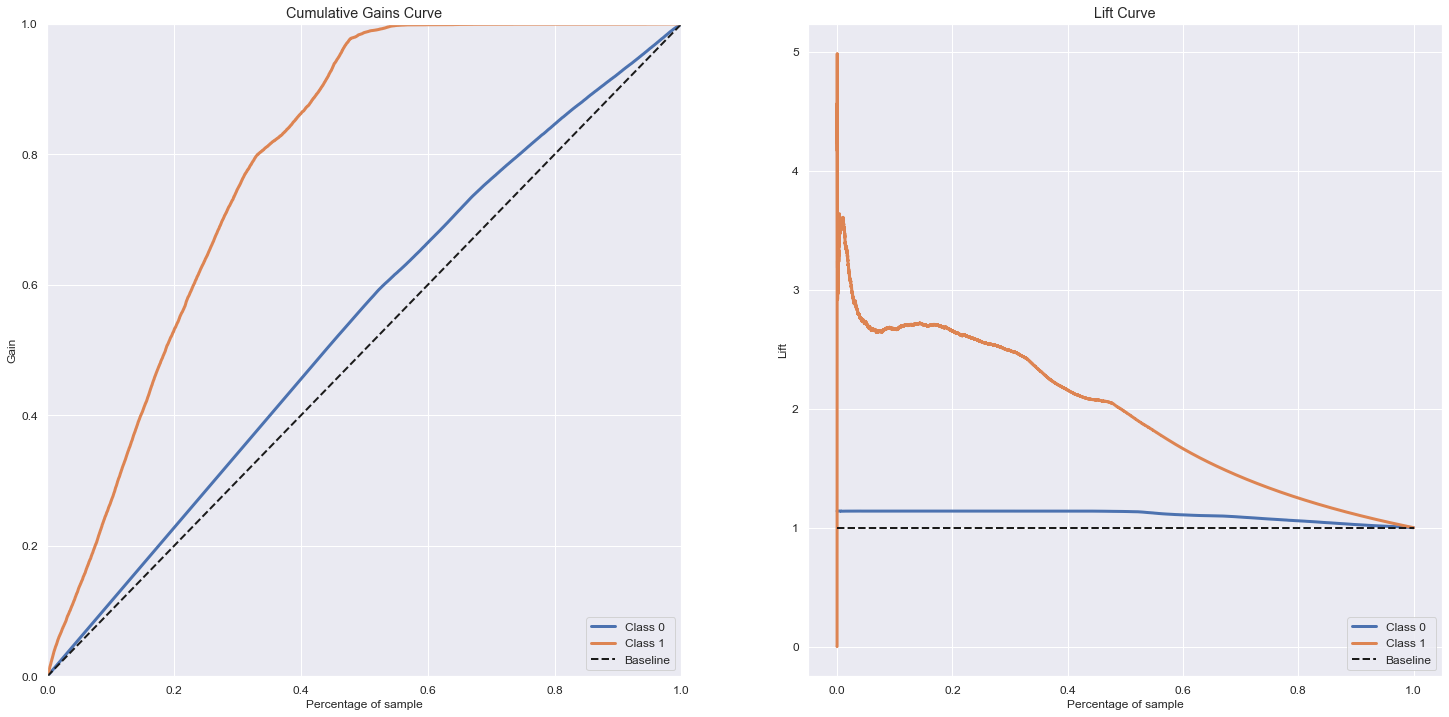

In [ ]:
fig ,ax = plt.subplots(1,2)
skplt.metrics.plot_cumulative_gain(y_val,yhat_lm_proba,ax=ax[0]);
skplt.metrics.plot_lift_curve(y_val,yhat_lm_proba,ax=ax[1]);

## Random forrest classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=1000,random_state=42,n_jobs=-1)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
#model prediction proba - poder de generalizção
yhat_rf_proba = rf_model.predict_proba( x_val )

#model prediction - poder de generalizção
yhat_rf_class = rf_model.predict( x_val )

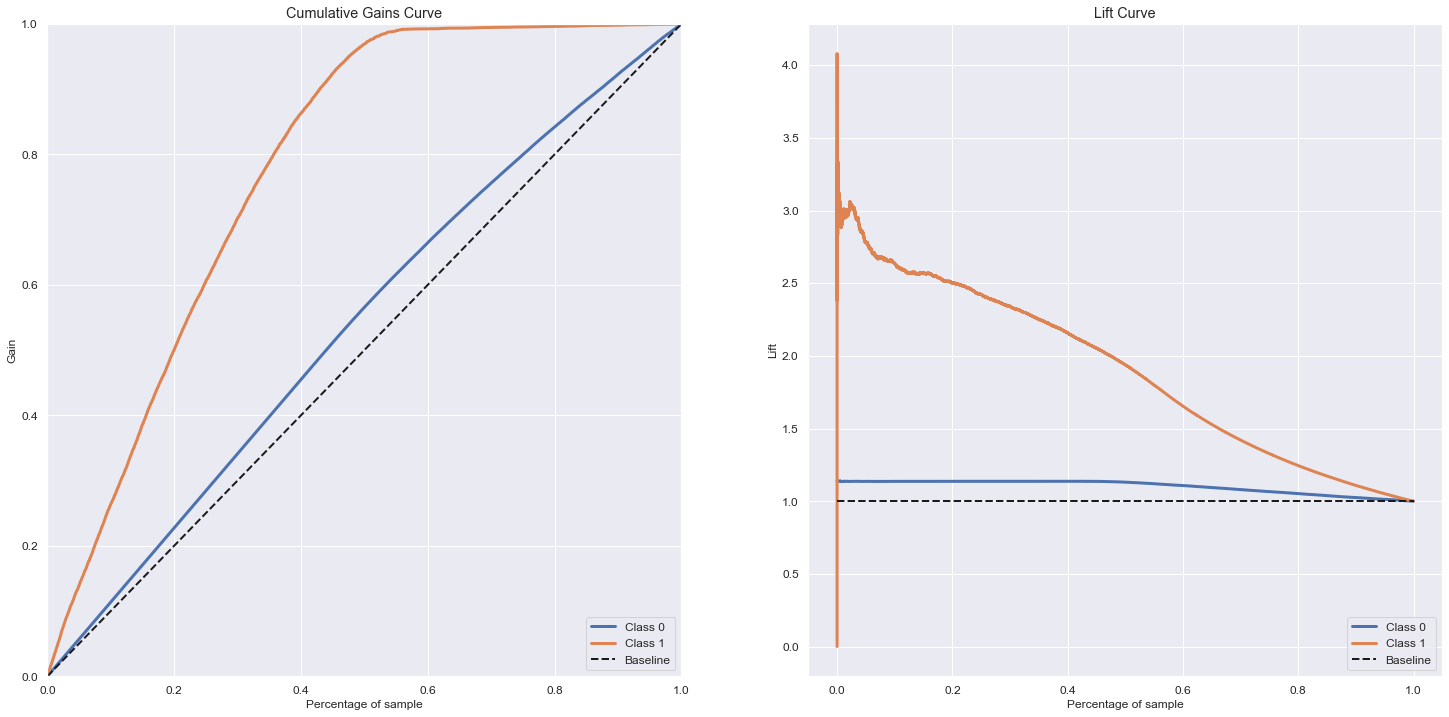

In [ ]:
fig ,ax = plt.subplots(1,2)
skplt.metrics.plot_cumulative_gain(y_val,yhat_rf_proba,ax=ax[0]);
skplt.metrics.plot_lift_curve(y_val,yhat_rf_proba,ax=ax[1]);

## Extratree classifier

In [ ]:
et_model = ExtraTreesClassifier(n_estimators=1000,random_state=42,n_jobs=-1)
et_model.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
#model prediction proba - poder de generalizção
yhat_et_proba = et_model.predict_proba( x_val )

#model prediction - poder de generalizção
yhat_et_class = et_model.predict( x_val )

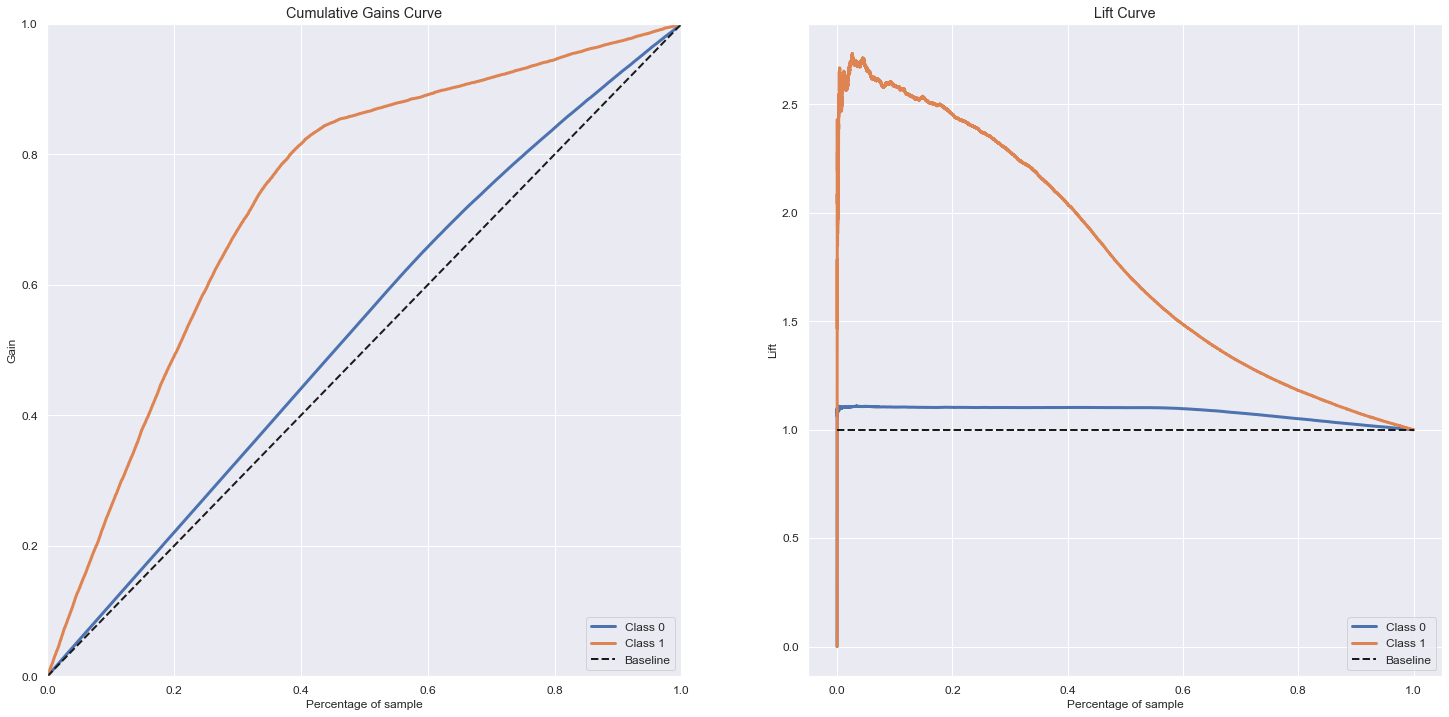

In [ ]:
fig ,ax = plt.subplots(1,2)
skplt.metrics.plot_cumulative_gain(y_val,yhat_et_proba,ax=ax[0]);
skplt.metrics.plot_lift_curve(y_val,yhat_et_proba,ax=ax[1]);

## XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(objective='reg:squarederror',
                             n_estimators=1000,
                             eta=0.01,
                             max_depth=10,
                             subsample=0.7,
                             colsample_bytree=0.9).fit(X_train,y_train)

In [ ]:
#model prediction proba - poder de generalizção
yhat_xgb_proba = xgb_model.predict_proba( x_val )

#model prediction - poder de generalizção
yhat_xgb_class = xgb_model.predict( x_val )

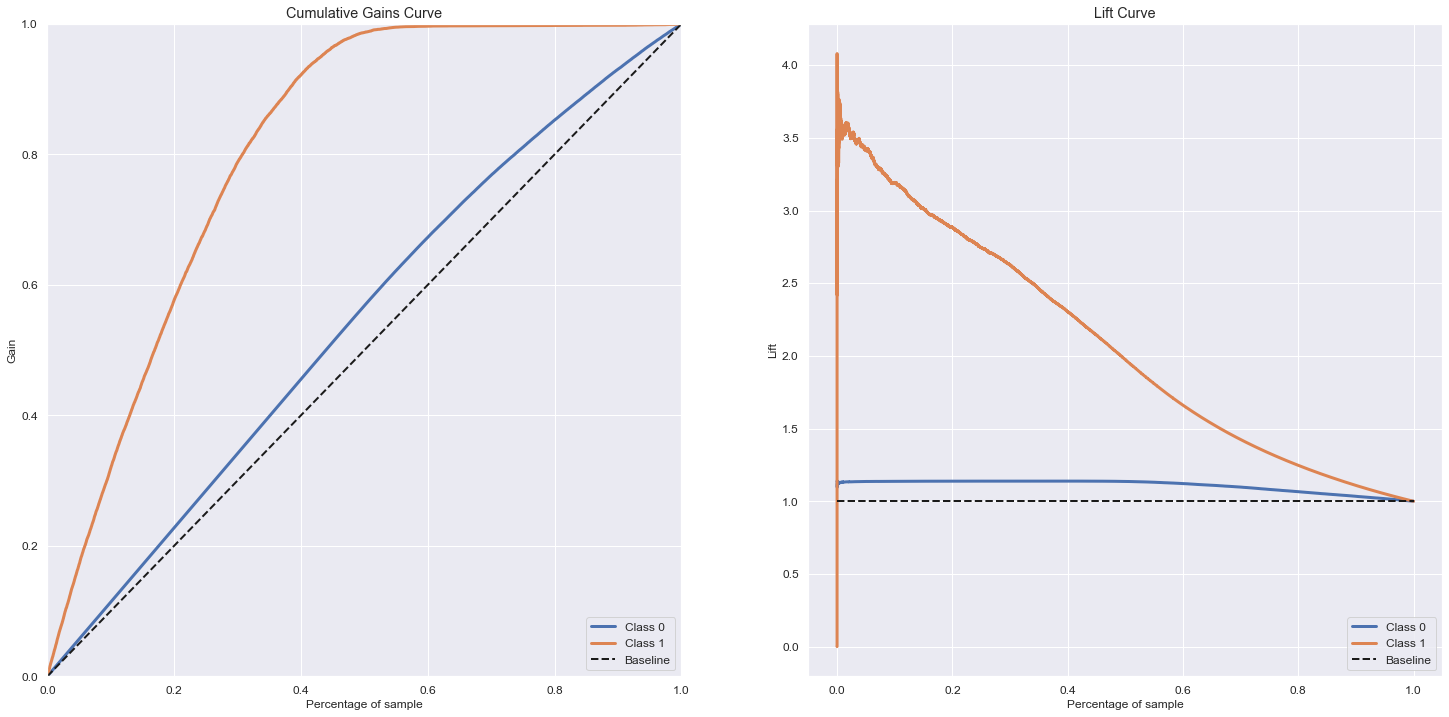

In [ ]:
fig ,ax = plt.subplots(1,2)
skplt.metrics.plot_cumulative_gain(y_val,yhat_xgb_proba,ax=ax[0]);
skplt.metrics.plot_lift_curve(y_val,yhat_xgb_proba,ax=ax[1]);

# Model performace 

In [ ]:
clients = 2000

## KNN

In [ ]:
knn_df = val.copy()

In [ ]:
knn_df['score_knn'] = yhat_knn_proba[:,1].tolist()
# sorte by score
knn_df = knn_df.sort_values('score_knn',ascending=False)

In [ ]:
knn_df.head()

,id,age,region_code,policy_sales_channel,previously_insured,vintage,vehicle_age,vehicle_damage,response,score_knn
87582,87583,0.369231,28.0,26.0,0,0.968858,2,1,1,1.0
209375,209376,0.230769,47.0,124.0,0,0.685121,2,1,0,1.0
23137,23138,0.030769,10.0,26.0,0,0.844291,2,1,0,1.0
334075,334076,0.400000,43.0,155.0,0,0.048443,2,1,1,1.0
66585,66586,0.338462,12.0,26.0,0,0.038062,2,1,1,1.0


In [ ]:
knn_performace = performace("KNN",knn_df,y_val,yhat_knn_class,clients)

In [ ]:
knn_performace

,Model Name,Precison,Recall,k,Precison at k,Recall at k
0,KNN,0.338387,0.178406,2000,0.362319,0.051738


## Linear model

In [ ]:
lm_df = val.copy()

In [ ]:
lm_df['score_lm'] = yhat_lm_proba[:,1].tolist()
# sorte by score
lm_df = lm_df.sort_values('score_lm',ascending=False)

In [ ]:
lm_df.head()

,id,age,region_code,policy_sales_channel,previously_insured,vintage,vehicle_age,vehicle_damage,response,score_lm
205844,205845,0.169231,1.0,26.0,0,0.380623,3,1,0,0.538778
375383,375384,0.153846,9.0,31.0,0,0.782007,3,1,0,0.537737
334418,334419,0.184615,28.0,26.0,0,0.141869,3,1,0,0.531767
330638,330639,0.184615,28.0,26.0,0,0.432526,3,1,1,0.530637
91143,91144,0.184615,28.0,26.0,0,0.979239,3,1,0,0.528510


In [ ]:
lm_performace = performace("linear model",lm_df,y_val,yhat_lm_class,clients)

In [ ]:
lm_performace

,Model Name,Precison,Recall,k,Precison at k,Recall at k
0,linear model,0.444444,0.001998,2000,0.405297,0.057875


# Randon forrest

In [ ]:
rf_df = val.copy()

In [ ]:
rf_df['score_rf'] = yhat_rf_proba[:,1].tolist()
# sorte by score
rf_df = rf_df.sort_values('score_rf',ascending=False)

In [ ]:
rf_df.head()

,id,age,region_code,policy_sales_channel,previously_insured,vintage,vehicle_age,vehicle_damage,response,score_rf
106975,106976,0.153846,28.0,26.0,0,0.162630,1,1,0,0.997000
70894,70895,0.415385,28.0,26.0,0,0.550173,2,1,1,0.994091
223683,223684,0.369231,28.0,26.0,0,0.851211,2,1,0,0.994042
287179,287180,0.384615,28.0,26.0,0,0.653979,2,1,0,0.991699
72981,72982,0.384615,28.0,26.0,0,0.653979,2,1,0,0.991699


In [ ]:
rf_performace = performace("Random forest",rf_df,y_val,yhat_rf_class,clients)

In [ ]:
rf_performace

,Model Name,Precison,Recall,k,Precison at k,Recall at k
0,Random forest,0.328247,0.207236,2000,0.367816,0.052523


# Extra trees

In [ ]:
et_df = val.copy()

In [ ]:
et_df['score_et'] = yhat_et_proba[:,1].tolist()
# sorte by score
et_df = et_df.sort_values('score_et',ascending=False)

In [ ]:
et_df.head()

,id,age,region_code,policy_sales_channel,previously_insured,vintage,vehicle_age,vehicle_damage,response,score_et
162479,162480,0.461538,28.0,26.0,0,0.522491,2,1,0,1.0
274450,274451,0.523077,28.0,26.0,0,0.667820,2,1,1,1.0
131269,131270,0.307692,8.0,26.0,0,0.619377,2,1,0,1.0
279230,279231,0.415385,28.0,26.0,0,0.653979,2,1,1,1.0
291835,291836,0.061538,8.0,152.0,0,0.010381,1,1,0,1.0


In [ ]:
et_performace = performace("Extra trees",et_df,y_val,yhat_et_class,clients)

In [ ]:
et_performace

,Model Name,Precison,Recall,k,Precison at k,Recall at k
0,Extra trees,0.316407,0.204096,2000,0.316342,0.045172


## XGboost

In [ ]:
xgb_df = val.copy()

In [ ]:
xgb_df['score_xgb'] = yhat_xgb_proba[:,1].tolist()
# sorte by score
xgb_df = xgb_df.sort_values('score_xgb',ascending=False)

In [ ]:
xgb_df.head()

,id,age,region_code,policy_sales_channel,previously_insured,vintage,vehicle_age,vehicle_damage,response,score_xgb
308033,308034,0.446154,8.0,3.0,0,0.996540,2,1,0,0.833463
269431,269432,0.153846,3.0,163.0,0,0.975779,2,1,0,0.792653
359029,359030,0.584615,28.0,3.0,0,0.619377,3,1,0,0.786391
177941,177942,0.384615,28.0,124.0,0,0.307958,1,1,1,0.732223
61336,61337,0.461538,28.0,124.0,0,0.439446,1,1,1,0.723999


In [ ]:
xgb_performace = performace("XGBoost",xgb_df,y_val,yhat_xgb_class,clients)

In [ ]:
xgb_performace

,Model Name,Precison,Recall,k,Precison at k,Recall at k
0,XGBoost,0.447059,0.021694,2000,0.438781,0.062656


# Model comparrison

In [ ]:
model_comp = pd.concat([knn_performace,lm_performace,rf_performace,et_performace,xgb_performace])

In [ ]:
model_comp.sort_values('Precison at k',ascending=False)

,Model Name,Precison,Recall,k,Precison at k,Recall at k
0,XGBoost,0.447059,0.021694,2000,0.438781,0.062656
0,linear model,0.444444,0.001998,2000,0.405297,0.057875
0,Random forest,0.328247,0.207236,2000,0.367816,0.052523
0,KNN,0.338387,0.178406,2000,0.362319,0.051738
0,Extra trees,0.316407,0.204096,2000,0.316342,0.045172


# Croos validation

In [2]:
def performace_cross_val(data,target,model,model_name,round_n=3,splits=4,shuffle_n=True,random=42,k=2000):
    import sklearn.model_selection as ms
    import sklearn.metrics
    import numpy as np
    skf = ms.StratifiedKFold(n_splits=splits,shuffle=shuffle_n,random_state=random)
    X = data
    y = X[target]
    X = X.drop(columns=[target,'id'])
    precision = []
    recall = []
    prec_k = []
    rec_k = []
    for train_index, test_index in skf.split(X,y):
        #train the model 
        model.fit(X.iloc[train_index],y.iloc[train_index])

        #predict the classification 
        yhat_class = model.predict( X.iloc[test_index] )

        #predict the probabilit
        yhat_proba = model.predict_proba(X.iloc[test_index])

        # precision and recall
        prec = sklearn.metrics.precision_score(y.iloc[test_index],yhat_class)
        rec = sklearn.metrics.recall_score(y.iloc[test_index],yhat_class)
        precision.append(prec)
        recall.append(rec)

        # sort the test dataframe by the probabiliti score of the model
        aux = X.iloc[test_index]
        aux[target] = y[test_index]
        aux['score'] = yhat_proba[:,1].tolist()

        # sorte by score
        aux = aux.sort_values('score',ascending=False)

        # precision and recall at k
        prec_k.append(precision_at_k(aux,k))
        rec_k.append(recall_at_k(aux,k))
        print(prec,rec,precision_at_k(aux,k),recall_at_k(aux,k))

    # return a dataset with the metrics    
    return pd.DataFrame({'Model name': model_name + " Cross_Val",
                                'PRECISION CROSS_VAL': np.round( np.mean( precision ), round_n ).astype( str ) + ' +/- ' + np.round( np.std( precision ), round_n ).astype( str ),
                                'RECALL CROSS_VAL': np.round( np.mean( recall ), round_n ).astype( str ) + ' +/- ' + np.round( np.std( recall ), round_n ).astype( str ),
                                'PRECISION AT K CROSS_VAL': np.round( np.mean( prec_k ), round_n ).astype( str ) + ' +/- ' + np.round( np.std( prec_k ), round_n ).astype( str ),
                                'RECALL AT K CROSS_VAL': np.round( np.mean( rec_k), round_n ).astype( str ) + ' +/- ' + np.round( np.std( rec_k ), round_n ).astype( str ) },index=[0]) 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3161d838-98a4-47ed-ae81-127ad2068af4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>